# Hypothesis Testing

## Getting Started
### Libraries to Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

### Read in Data

This is a fairly common dataset, here sourced from [data.world](https://data.world/data-society/capital-bikeshare-2011-2012), but also available from the UCI database.

In [2]:
df = pd.read_csv('Data/bike_data.csv')

## Data Cleaning

Our date column was an object, so transform to a datetime with pandas and create a new column for Month.

In [3]:
df.Date = pd.to_datetime(arg=df.Date) #dtype('<M8[ns]')
df['Month'] = df['Date'].dt.month

In [4]:
df.sample(5)

Date  Season  Hour  Holiday  Day of the Week  Working Day  \
12501 2012-06-10       2     2        0                0            0   
15320 2012-10-05       3    13        0                5            1   
11382 2012-04-24       1    11        0                2            1   
4972  2011-07-31       2     2        0                0            0   
1320  2011-02-28       4     7        0                1            1   

       Weather Type  Temperature F  Temperature Feels F  Humidity  Wind Speed  \
12501             1           71.1                 75.2        69           9   
15320             1           76.3                 80.6        48           0   
11382             1           55.6                 57.2        31          26   
4972              1           79.8                 86.0        66           6   
1320              2           47.0                 46.4        93           7   

       Casual Users  Registered Users  Total Users  Month  
12501            17                56           73      6  
15320           117               307          424     10  
11382            27               157          184      4  
4972             19                48           67      7  
1320              2                90           92      2

## Hypothesis Testing

### Do users ride more during comfortable temperatures?

Thanks to Matt Wilkins for his bike riding expertise. 

In [5]:
df['Comfortable Temp?'] = np.where((df['Temperature Feels F'] > 50) & (df['Temperature Feels F'] < 85), 1, 0)

#### Let's Start with some Visualization

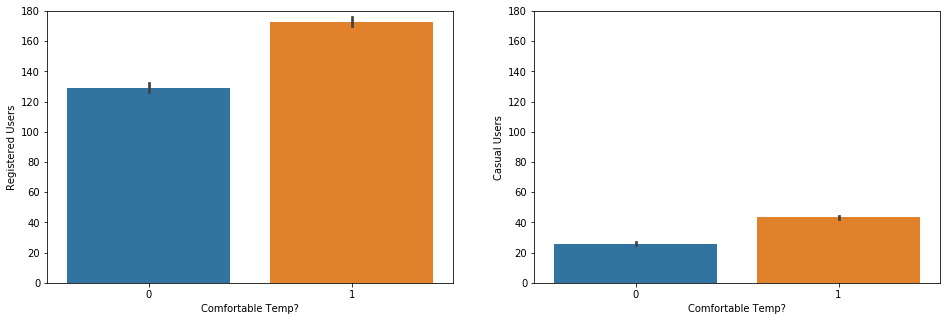

In [6]:
fig, ax = plt.subplots(1,2)
sns.barplot(data=df, x='Comfortable Temp?', y='Registered Users', ax=ax[0])
sns.barplot(data=df, x='Comfortable Temp?', y='Casual Users', ax=ax[1])
ax[0].set(ylim=(0, 180))
ax[1].set(ylim=(0, 180))
fig.set_figheight(5)
fig.set_figwidth(16)
plt.show()

In [7]:
comfy_registered = df[df['Comfortable Temp?'] == 1]['Registered Users']
noncomfy_registered = df[df['Comfortable Temp?'] == 0]['Registered Users']

In [8]:
scipy.stats.ttest_ind(comfy_registered, noncomfy_registered)

Ttest_indResult(statistic=19.141783708515234, pvalue=7.6926513295976845e-81)

With a p-value significantly lower than 0.05, we can conclude that these means are statistically different and that temperature does affect the level of registered ridership.

In [9]:
comfy_casual = df[df['Comfortable Temp?'] == 1]['Casual Users']
noncomfy_casual = df[df['Comfortable Temp?'] == 0]['Casual Users']

In [10]:
scipy.stats.ttest_ind(comfy_casual, noncomfy_casual)

Ttest_indResult(statistic=23.30627567580721, pvalue=2.4872749610746814e-118)

With a p-value significantly lower than 0.05, we can conclude that these means are statistically different and that temperature does affect the level of casual ridership.

### Does Weather Type affect ridership of registered users?

How much does a bad weather day affect that day's rides/revenue?

### Do more riders ride in the morning or evening? 

Do people bike into work but not out, or vice versa, what are the pain points driving this behavior?

### Are there more riders in 2011 or 2012?

Is our market share growing?

### Are there differences in monthly ridership? Between registered and casual?

### Percentage of rides that are rush hour commutes? 

Idea is to say, here is when you should ride for less congestion.

### Look into what is counted as a holiday here...